 Clean the provided sales_data.csv datset and analyze sales performance across regions, products, customer segments, and time. Produce at least 4 visualizations, answer the business questions below and submit a cleaned CSV, a jupyter notebook with code + comments and a one page summary with top 5 insights and recommendations.

 Q.1) Most Preferred Payment Method ?

 Q.2) Most Selling Product - By Quantity & By Revenue ?

 Q.3) Which city had maximum revenue , or , Which Manager earned maximum revenue ?

 Q.4) Month wise revenue.

 Q.5) Average Revenue.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.options.display.max_columns = 60
pd.options.display.max_rows = 20
plt.rcParams['figure.figsize'] = (10,6)

In [55]:
df = pd.read_csv('sales data.csv')
print('Shape of df', df.shape)
display(df.head(6))

Shape of df (254, 9)


,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
5,10457,08-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris


# Quick summary (EDA)

In [56]:
df.info() #dtype and non-null values count

display(df.describe(include = 'all').transpose())

print('Missing values per column\n',df.isnull().sum())

print('Number of duplicate rows', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order ID,254.0,NaN,NaN,NaN,10584.133858,75.889181,10452.0,10520.25,10583.5,10649.75,10713.0
Date,254,53,03-12-2022,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,254,5,Burgers,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,254.0,NaN,NaN,NaN,7.102323,4.341855,2.95,3.49,4.99,9.95,29.05
Quantity,254.0,NaN,NaN,NaN,460.611457,214.888699,200.4,201.01,538.88,677.44,754.43
Purchase Type,254,3,Online,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payment Method,254,3,Credit Card,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Manager,254,14,Tom Jackson,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,254,5,London,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing values per column
 Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64
Number of duplicate rows 0


In [57]:
df['Date'] = pd.to_datetime(df['Date'], errors= 'coerce') #bad parse -> NaT

print('Date parsing NaT count: ', df['Date'].isna().head())

# Optional inspects bad rows

display(df[df['Date'].isna()].head())

# For analysis drop rows without a valid date

df = df.dropna(subset= ['Date']).copy()
df = df.sort_values('Date').reset_index(drop= True)


Date parsing NaT count:  0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool


,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
26,10480,NaT,Burgers,12.99,508.08,In-store,Credit Card,Pablo Perez,Madrid
27,10481,NaT,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Pablo Perez,Madrid
28,10482,NaT,Fries,25.50,630.37,In-store,Credit Card,Joao Silva,Lisbon
29,10486,NaT,Chicken Sandwiches,29.05,201.01,In-store,Credit Card,Joao Silva,Lisbon
30,10487,NaT,Fries,3.49,630.37,In-store,Credit Card,Joao Silva,Lisbon


Why 

Time series operations require true datetime

errors = 'coerce' helps catch malformed dates

# Ensure numeric types for Price, Quantity

In [58]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

df['Quantity'] = pd.to_numeric(df['Quantity'],errors='coerce')

print(df[['Price','Quantity']].dtypes)


Price       float64
Quantity    float64
dtype: object


In [59]:
df['Revenue'] = df['Quantity'] * df['Price']

display(df['Revenue'].describe())

count      83.000000
mean     2879.531745
std      2194.658884
min       999.996000
25%      2000.011500
50%      2000.049500
75%      2199.991300
max      7600.059300
Name: Revenue, dtype: float64

In [60]:
df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

df['MonthName'] = df['Date'].dt.strftime('%b')

df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

In [61]:
print(df.head())

   Order ID       Date             Product  Price  Quantity Purchase Type  \
0     10570 2022-01-12             Burgers  12.99    492.69       Online    
1     10572 2022-01-12               Fries   3.49    573.07       Online    
2     10573 2022-01-12           Beverages   2.95    677.97       Online    
3     10574 2022-01-12       Sides & Other   4.99    200.40       Online    
4     10571 2022-01-12  Chicken Sandwiches   9.95    201.01       Online    

  Payment Method      Manager    City    Revenue  Year  Month MonthName  \
0    Credit Card  Tom Jackson  London  6400.0431  2022      1       Jan   
1    Credit Card   Remy Monet   Paris  2000.0143  2022      1       Jan   
2    Credit Card   Remy Monet   Paris  2000.0115  2022      1       Jan   
3    Credit Card   Remy Monet   Paris   999.9960  2022      1       Jan   
4    Credit Card  Tom Jackson  London  2000.0495  2022      1       Jan   

  YearMonth  
0   2022-01  
1   2022-01  
2   2022-01  
3   2022-01  
4   2022-01  


Answer business question with grouby and pivot

In [62]:
total_transaction = len(df)

print('Total Transaction', total_transaction)

total_revenue = df['Revenue'].sum()

print('Total Revenue', total_revenue)

avg_order_value = df['Revenue'].mean()

print('Average Order', avg_order_value)

Total Transaction 83
Total Revenue 239001.1348
Average Order 2879.5317445783135


### Revenue by manager

In [145]:
rev_by_manager = df.groupby(['Manager','City'])['Revenue'].sum().sort_values(ascending=True)
display(rev_by_manager)

Manager             City  
Joao    Silva       Lisbon       999.9960
Pablo    Perez      Madrid       999.9960
Remy     Monet      Paris        999.9960
Remy    Monet       Paris       2000.0143
Tom      Jackson    London      2000.0143
Pablo   Perez       Madrid      2199.9913
Pablo  Perez        Madrid      2199.9913
Joao Silva          Lisbon      3000.0075
       Remy Monet   Paris       4000.0258
Walter Muller       Berlin     10400.0588
Pablo Perez         Madrid     15200.0921
       Pablo Perez  Madrid     23200.0330
Remy Monet          Paris      37000.1468
Tom Jackson         London    134800.7716
Name: Revenue, dtype: float64

### Revenue by city

In [64]:
rev_by_city = df.groupby('City')['Revenue'].sum().sort_values(ascending=True)
display(rev_by_city)

City
Lisbon      4000.0035
Berlin     10400.0588
Madrid     43800.1037
Paris      44000.1829
London    136800.7859
Name: Revenue, dtype: float64

In [65]:
# Interpretation - Region with highest value - east
rev_by_manager = (rev_by_manager/total_revenue*100).round(2)
display(rev_by_manager)

Manager
Joao    Silva          0.42
Pablo    Perez         0.42
Remy     Monet         0.42
Remy    Monet          0.84
Tom      Jackson       0.84
Pablo   Perez          0.92
Pablo  Perez           0.92
Joao Silva             1.26
       Remy Monet      1.67
Walter Muller          4.35
Pablo Perez            6.36
       Pablo Perez     9.71
Remy Monet            15.48
Tom Jackson           56.40
Name: Revenue, dtype: float64

### Top products by revenue

In [66]:
top_product_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
display(top_product_revenue)

top_product_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
display(top_product_quantity)

Product
Burgers               120600.1992
Fries                  36000.0131
Chicken Sandwiches     34000.8415
Beverages              32400.1450
Sides & Other          15999.9360
Name: Revenue, dtype: float64

Product
Beverages             10983.10
Fries                 10315.19
Burgers                9284.08
Chicken Sandwiches     3417.17
Sides & Other          3206.40
Name: Quantity, dtype: float64

In [67]:
prod_sum = df.groupby('Product').agg(total_revenue = ('Revenue', 'sum'), total_units = ('Quantity', 'sum'), Avg_price = ('Price', 'mean'))
display(prod_sum.head())

,total_revenue,total_units,Avg_price
Product,,,
Beverages,32400.1450,10983.10,2.95
Burgers,120600.1992,9284.08,12.99
Chicken Sandwiches,34000.8415,3417.17,9.95
Fries,36000.0131,10315.19,3.49
Sides & Other,15999.9360,3206.40,4.99


### Calculate Monthly Sales Trend

In [ ]:
df_ts = df.set_index('Date').sort_index()\

monthly_rev = df_ts['Revenue'].resample('ME').sum()

display(monthly_rev.head(10))

Date
2022-01-31    13400.1144
2022-02-28    14000.0535
2022-03-31    14000.0535
2022-04-30     9000.1007
2022-05-31    14200.0386
2022-06-30    14000.1225
2022-07-31    19200.0558
2022-08-31    26600.1726
2022-09-30    28800.1002
2022-10-31    27800.1042
Freq: ME, Name: Revenue, dtype: float64

### Which payment method are most used and most profitable ?


In [69]:
rev_pay = df.groupby('Payment Method')['Revenue'].sum().sort_values(ascending= False)

display(rev_pay)

Payment Method
Credit Card    155600.7613
Gift Card       67000.2827
Cash            16400.0908
Name: Revenue, dtype: float64

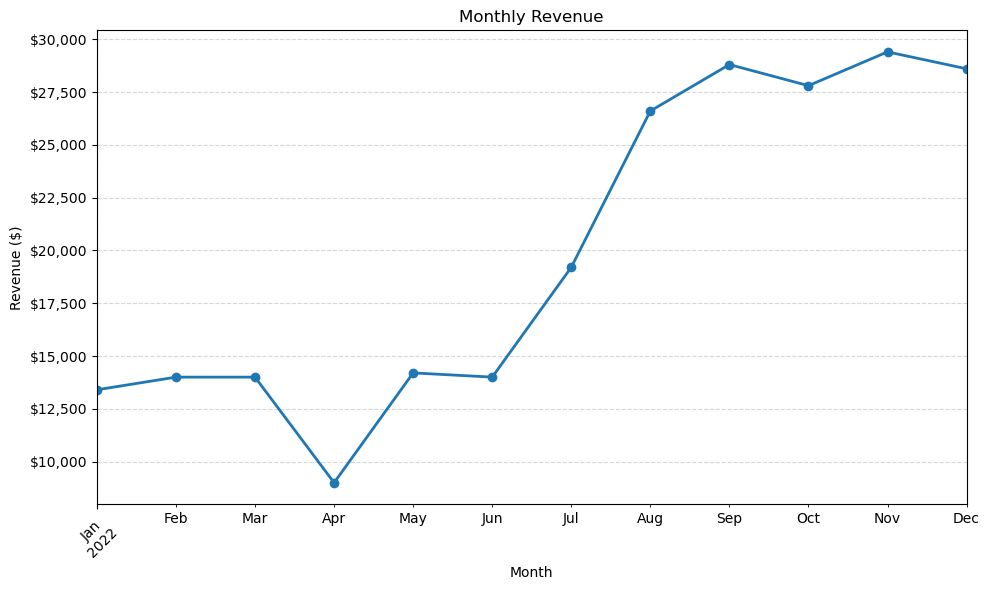

In [ ]:
import matplotlib.ticker as mtick

monthly_rev.plot(kind='line', marker = 'o', linewidth= 2,title = 'Monthly Revenue')

plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True, linestyle= '--', alpha= 0.5)

#format

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0F}'))

plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()


### Revenue by payment method

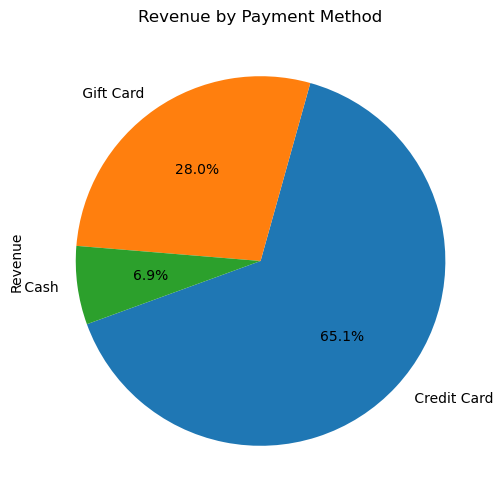

In [164]:

rev_pay.plot(kind = 'pie',autopct= '%1.1f%%', startangle = 200,title= 'Revenue by Payment Method')

plt.show()

### Top products by revenue

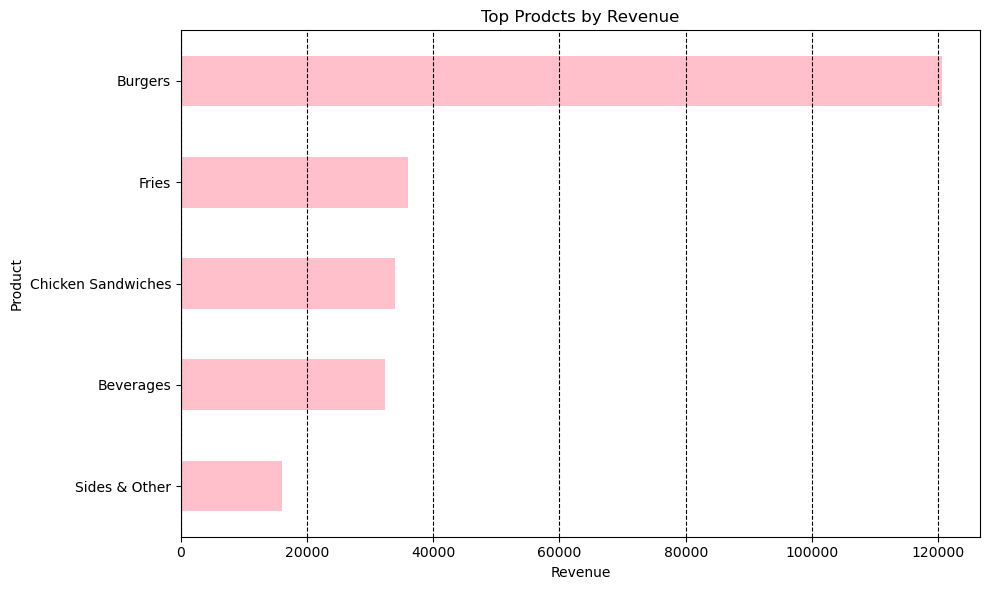

In [143]:
top_product_revenue.head().sort_values().plot(kind= 'barh', title = 'Top Prodcts by Revenue', color= 'pink')
plt.xlabel('Revenue')
plt.grid(axis = 'x', linestyle = '--', color = 'Black')
plt.tight_layout()
plt.show()

### Revenue by City

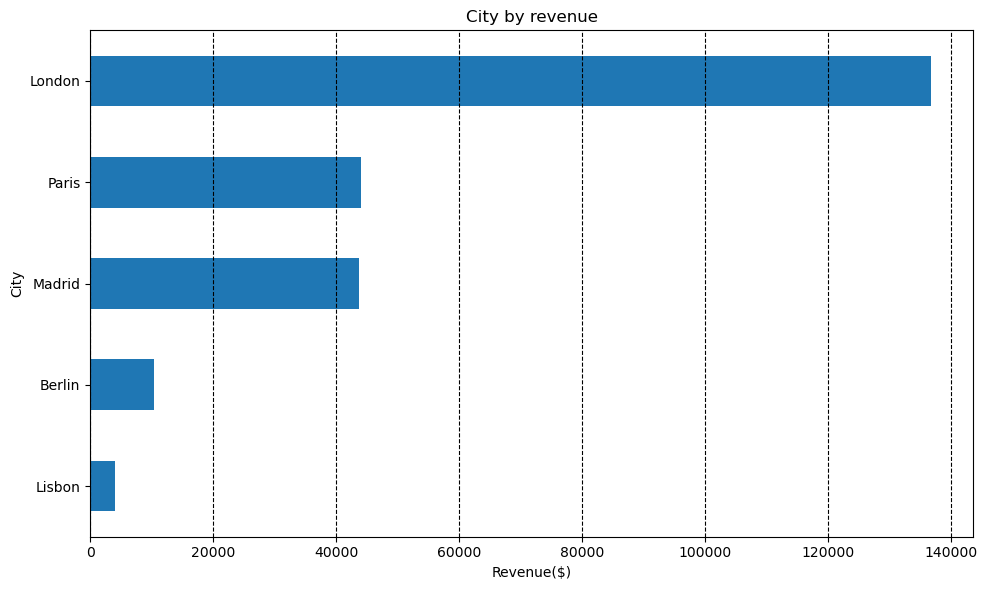

In [166]:
rev_city = df.groupby('City')['Revenue'].sum().sort_values()

# rev_city.plot(kind = 'pie',autopct= '%1.1f%%', startangle = 200,title= 'Revenue by City')

# plt.show()
rev_city.plot(kind= 'barh',title='City by revenue')

plt.xlabel('Revenue($)')
plt.grid(axis = 'x', linestyle = '--', color = 'Black')
plt.tight_layout()
plt.show()

### Revenue by Manager & City

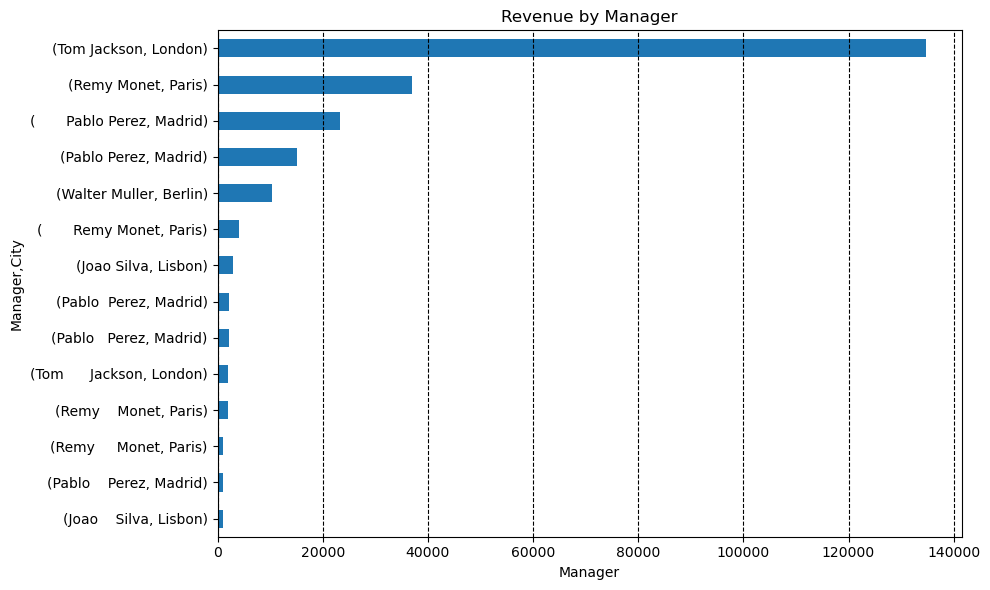

In [ ]:
rev_by_manager.plot(kind= 'barh', title = 'Revenue by Manager')

plt.xlabel('Manager')
plt.grid(axis = 'x', linestyle = '--', color = 'Black')
plt.tight_layout()
plt.show()

### Final Summary

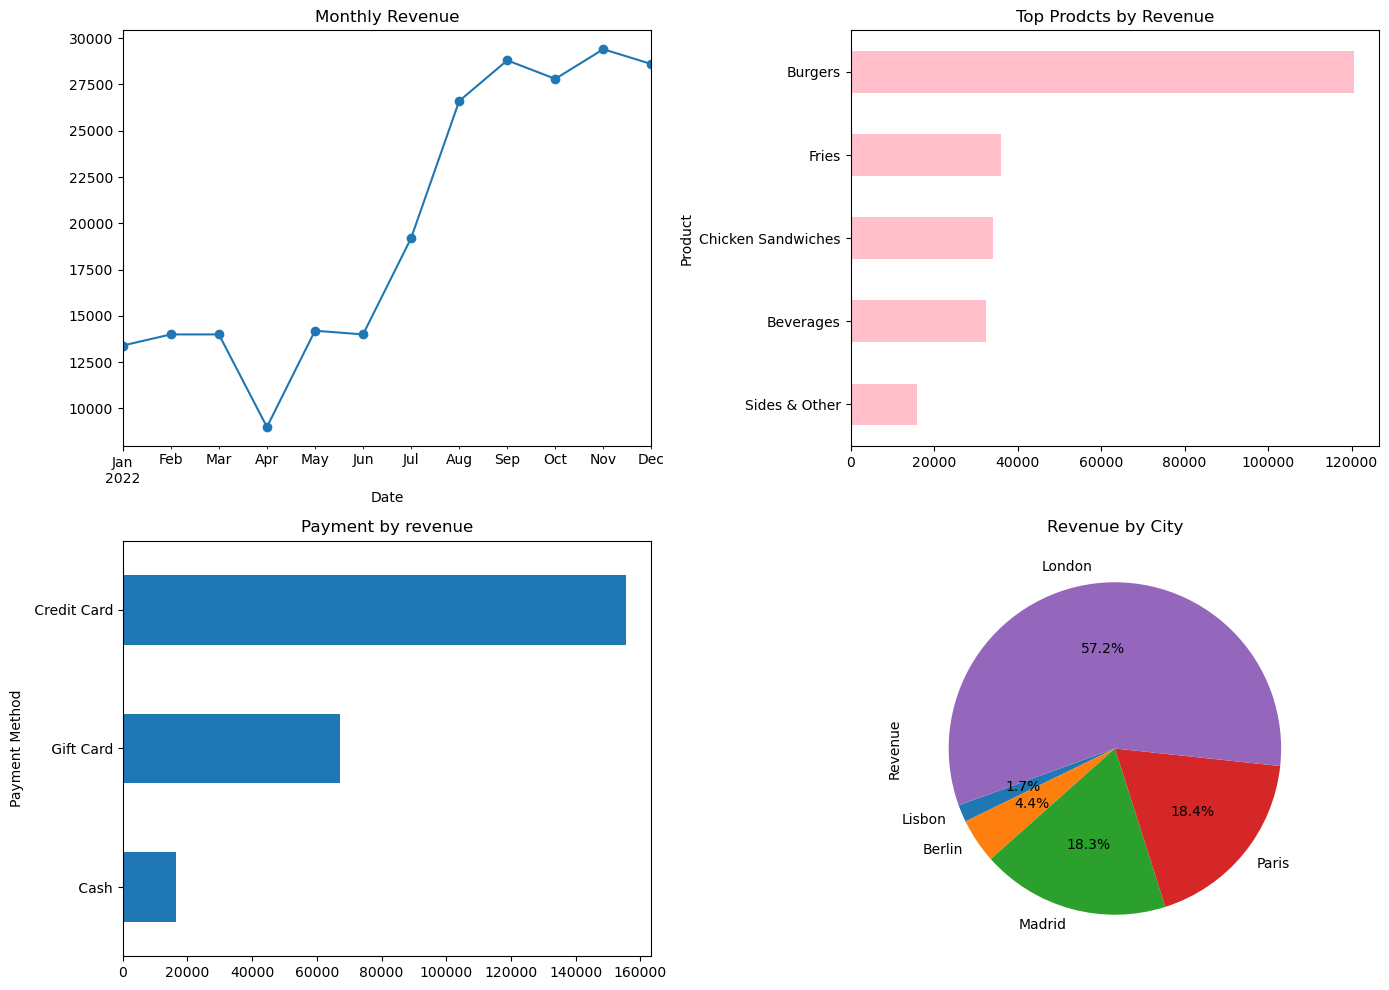

In [165]:
fig, axis = plt.subplots(2,2,figsize= (14,10))

monthly_rev.plot(ax = axis[0,0],title='Monthly Revenue', marker = 'o')

top_product_revenue.head().sort_values().plot(kind= 'barh', ax= axis[0,1], title = 'Top Prodcts by Revenue', color= 'pink')

# rev_by_manager.plot(kind= 'barh', ax = axis[1,0], title = 'Revenue by Manager')
rev_pay.sort_values().plot(kind= 'barh',ax = axis[1,0],title='Payment by revenue')

rev_city.plot(kind = 'pie',autopct= '%1.1f%%',ax = axis[1,1], startangle = 200,title= 'Revenue by City')
plt.tight_layout()
plt.show()